In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Life Expectancy Data.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
cols=df.columns
cols

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df.isnull().any().sum()

14

In [7]:
df.fillna(method='bfill',inplace=True)
df.isnull().any().sum()

0

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()  
df['Status'] = le.fit_transform(df['Status'])

In [9]:
X=df.drop(columns=['Country','Life expectancy '])
y=df['Life expectancy ']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
#Random Forest Reggression

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [13]:
#training the model
model.fit(X_train,y_train)

RandomForestRegressor()

In [14]:
y_pred=model.predict(X_test)

In [15]:
def pred(Year, status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI,
           Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population,
Thinness_19_years, Thinness_9_years, Income_Composition, Schooling):
   x=[[Year,status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI,
Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population,
Thinness_19_years, Thinness_9_years, Income_Composition, Schooling]]
   y=model.predict(X)
   return y[0]

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

96.94827267247929

In [17]:
model.score(X_test,y_test)

0.969482726724793

<function matplotlib.pyplot.show(close=None, block=None)>

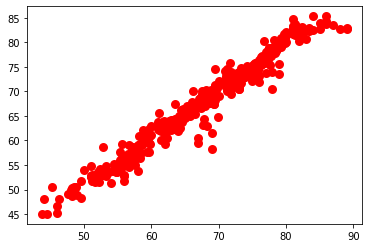

In [18]:
plt.scatter(y_test,y_pred,color='red', linewidth=3)
plt.show

In [19]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0600918367346945
MSE: 2.6463223299319742
RMSE: 1.6267520800453812


In [20]:
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

 

pred = ridgeReg.predict(X_test)



C:\python 37\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [21]:
def predRidge(Year, status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI,
           Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population,
Thinness_19_years, Thinness_9_years, Income_Composition, Schooling):
   x=[[Year,status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI,
Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population,
Thinness_19_years, Thinness_9_years, Income_Composition, Schooling]]

   y=ridgeReg.predict(X)
   return y[0]

In [22]:
ridgeReg.score(X_test,y_test)

0.8069629462435431

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.0002553015312814
MSE: 16.739315510046186
RMSE: 4.091370859509827


<function matplotlib.pyplot.show(close=None, block=None)>

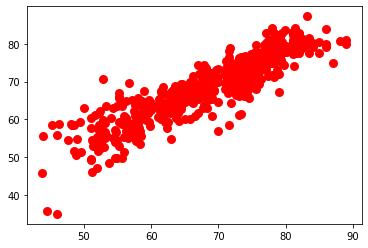

In [24]:
plt.scatter(y_test,pred,color='red', linewidth=3)
plt.show

In [25]:
predRidge(2013,0, 268, 66, 0.01, 73.21924272, 64, 430, 18.1, 89, 62, 8.13, 64, 0.1, 631.744976,31731688,17.7,17.7,0.47, 9.9)


60.46808281265723

In [26]:
predRidge(2008, 1, 76, 0,12, 8329.731655, 83, 448, 54.2, 0, 83, 1.6, 83, 0.1, 5138637665, 8321496, 1.7, 1.9, 0.864, 15.1)


60.46808281265723

In [27]:
predRidge(2015, 0, 263, 62, 0.01, 71.27962362, 65, 1154, 19.1, 83, 6, 8.16, 65, 0.1, 584.25921, 33736494, 17.2, 17.3, 0.479, 10.10)

60.46808281265723

In [28]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
pred_L=linear_model.predict(X_test)

In [29]:
def predLinear (Year, Status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI,
            Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population,
Thinness_19_years, Thinness_9_years, Income_Composition, Schooling): 
    x=[[Year, Status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI,
Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population, Thinness_19_years, Thinness_9_years, Income_Composition, Schooling]]
    y=linear_model.predict(x)

    return y[0]

In [30]:
linear_model.score (X_test,y_test)

0.8185741128299292

In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_L)) 
print('MSE:', metrics.mean_squared_error(y_test, pred_L)) 
print('RMSE:', np. sqrt(metrics.mean_squared_error(y_test, pred_L)))


MAE: 2.910073632349325
MSE: 15.732446739792167
RMSE: 3.9664148471626324


<function matplotlib.pyplot.show(close=None, block=None)>

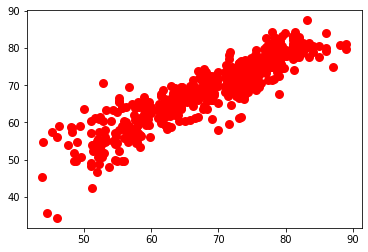

In [32]:
plt.scatter(y_test, pred_L, color='red', linewidth=3)
plt. show

In [33]:
predLinear(2013,0, 268, 66, 0.01, 73.21924272, 64, 430, 18.1, 89, 62, 8.13, 64, 0.1, 631.744976,31731688,17.7,17.7,0.47, 9.9)

C:\python 37\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


63.482137063531205

In [34]:
predLinear (2008, 1, 76, 0,12, 8329.731655, 83, 448, 54.2, 0, 83, 1.6, 83, 0.1, 51386.37665, 8321496, 1.7, 1.9, 0.864, 15.1)

C:\python 37\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0060404553637

In [35]:
import joblib
joblib.dump(model,'model.pkl')


['model.pkl']